In [25]:
import pandas as pd
import numpy as np
import math
from statistics import mean
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("edlich-kmeans-A0.csv")

In [27]:
df.sample(6), df.describe(), df.isna().sum()

(          V1         V2         V3
 97  2.979751  10.772783 -10.093143
 56 -4.365004   6.980472   4.190393
 27 -3.407863   3.248543  -6.194043
 59  3.404110   9.353538  -8.170535
 96 -1.675543   3.780111  -8.060940
 2  -8.385012  -3.902794   8.514620,
                V1          V2          V3
 count  100.000000  100.000000  100.000000
 mean    -0.731027    3.349859    0.046580
 std      5.660510    4.219921    7.334466
 min     -9.792300   -5.292139  -10.756151
 25%     -5.193274    1.509583   -8.184790
 50%     -1.690861    3.570038    3.630742
 75%      4.840492    6.526973    5.113720
 max     10.640624   10.772783   10.762034,
 V1    0
 V2    0
 V3    0
 dtype: int64)

### Task: Get the right k and print the classification vector!

#### A) What is the best k?
#### Result: k = 5

In [46]:
# calculate mean of all three vectors
mean_v1 = np.mean(df['V1'])
print("mean value for V1:", mean_v1)
mean_v2 = np.mean(df['V2'])
print("mean value for V2:", mean_v2)
mean_v3 = np.mean(df['V3'])
print("mean value for V3:", mean_v3)

mean value for V1: -0.7310272861999997
mean value for V2: 3.3498586040000005
mean value for V3: 0.04657998829999992


In [31]:
# calculate number of clusters
def cluster_variance(data, n):
    variances = []
    kmeans = []
    outputs = []
    K = [i for i in range(1, n+1)]
    for i in range(1, n+1):
        variance = 0
        m = KMeans(n_clusters=i, random_state=82, verbose=2).fit(data)
        kmeans.append(m)
        variances.append(m.inertia_)
    return variances, K, n

In [38]:
variances, K, n = cluster_variance(df, 7)

Initialization complete
Iteration  0, inertia 28727.053
Iteration  1, inertia 10260.707
Converged at iteration 1: center shift 0.000000e+00 within tolerance 3.420236e-03
Initialization complete
Iteration  0, inertia 22320.093
Iteration  1, inertia 10260.707
Converged at iteration 1: center shift 0.000000e+00 within tolerance 3.420236e-03
Initialization complete
Iteration  0, inertia 18444.395
Iteration  1, inertia 10260.707
Converged at iteration 1: center shift 0.000000e+00 within tolerance 3.420236e-03
Initialization complete
Iteration  0, inertia 23970.389
Iteration  1, inertia 10260.707
Converged at iteration 1: center shift 0.000000e+00 within tolerance 3.420236e-03
Initialization complete
Iteration  0, inertia 14713.495
Iteration  1, inertia 10260.707
Converged at iteration 1: center shift 0.000000e+00 within tolerance 3.420236e-03
Initialization complete
Iteration  0, inertia 18199.318
Iteration  1, inertia 10260.707
Converged at iteration 1: center shift 0.000000e+00 within tol

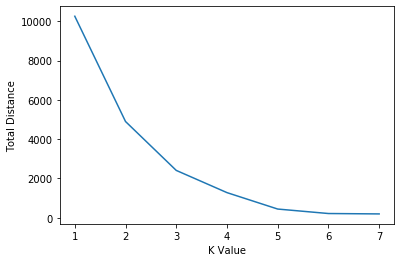

In [47]:
plt.plot(K, variances)
plt.ylabel("Total Distance")
plt.xlabel("K Value")
plt.xticks([i for i in range(1, n+1)])
plt.show()

#### B) Can you print the clustering vector?
- e.g. point i=1 belongs to cluster 1, point i=5 belongs to cluster 2, ...

In [48]:
kmeans = KMeans(n_clusters = 5)

In [49]:
kmeans =kmeans.fit(df)

In [50]:
labels = kmeans.predict(df)

In [51]:
C = kmeans.cluster_centers_

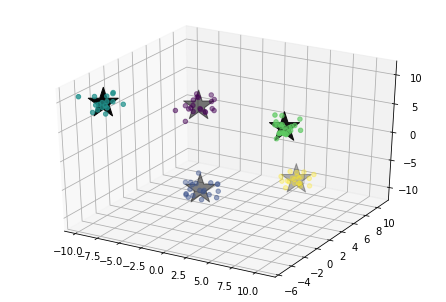

In [57]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df["V1"], df["V2"], df["V3"], c=labels)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=10)